In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from nilearn import datasets
from nilearn.stats.first_level_model import FirstLevelModel
import nibabel as nib
import numpy as np
data = datasets.fetch_localizer_first_level()
fmri_img = data.epi_img

In [2]:
t_r = 2.4
events_file = data['events']
import pandas as pd
events= pd.read_table(events_file)

In [3]:
# run analyze data normally
first_level_model = FirstLevelModel(t_r, minimize_memory=False)
first_level_model.fit(fmri_img, events=events)
design_matrix = first_level_model.design_matrices_[0]

In [4]:
design_matrix = first_level_model.design_matrices_[0]

In [5]:
img = nib.load(fmri_img)
# get middle voxel for plotting/comparison
middle_voxel = tuple(np.array(img.shape[:-1]) // 2)

/srv/conda/envs/notebook/lib/python3.7/site-packages/nilearn/stats/regression.py:341: FutureWarning: 'resid' from RegressionResults has been deprecated and will be removed. Please use 'residuals' instead.
  FutureWarning,


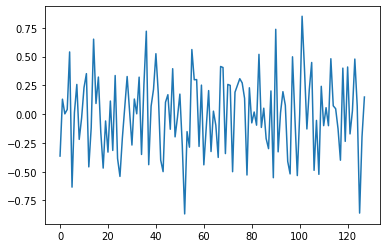

In [6]:
plt.plot(first_level_model.residuals[0].get_fdata()[middle_voxel])

In [7]:
# linear regression on middle voxel with sklearn
linr = LinearRegression()
linr.fit(design_matrix.values, img.get_fdata()[middle_voxel])

LinearRegression()

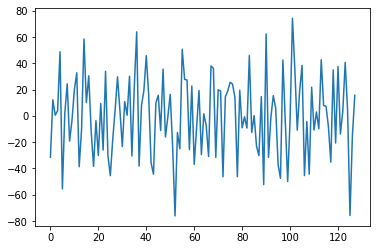

In [8]:
# look similar, yay!
linresid = img.get_fdata()[middle_voxel] - (np.sum(design_matrix.values * linr.coef_, axis=1) + linr.intercept_)
plt.plot(linresid)

In [9]:
# censor volume in design matrix
design_matrix_outlier = design_matrix.copy()
design_matrix_outlier['censor_volume'] = [1] + [0] * (len(design_matrix_outlier) - 1)

In [10]:
# add contant to img
img_data = img.get_fdata().copy()
img_data[..., 0] += 10000
outlier_img = nib.Nifti1Image(img_data, affine=img.affine, header=img.header)

In [11]:
outlier_model = FirstLevelModel(t_r, minimize_memory=False)
outlier_model.fit(outlier_img, design_matrices=design_matrix_outlier)

FirstLevelModel(minimize_memory=False, signal_scaling=True, t_r=2.4)

/srv/conda/envs/notebook/lib/python3.7/site-packages/nilearn/stats/regression.py:341: FutureWarning: 'resid' from RegressionResults has been deprecated and will be removed. Please use 'residuals' instead.
  FutureWarning,


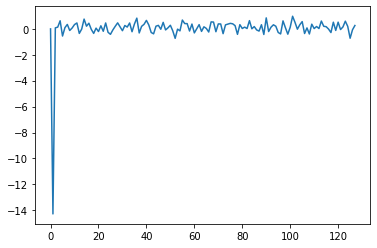

In [12]:
plt.plot(outlier_model.residuals[0].get_fdata()[middle_voxel])

In [13]:
# linear regression on middle voxel with sklearn
linr_outlier = LinearRegression()
linr_outlier.fit(design_matrix_outlier.values, outlier_img.get_fdata()[middle_voxel])

LinearRegression()

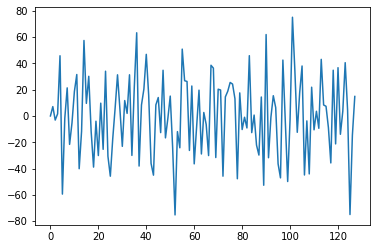

In [14]:
# different???
linresid_outlier = outlier_img.get_fdata()[middle_voxel] - (np.sum(design_matrix_outlier.values * linr_outlier.coef_, axis=1) + linr_outlier.intercept_)
plt.plot(linresid_outlier)